# Customer Churn Analysis
### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Variable Description:-

gender --> Whether the customer is a male or a female

SeniorCitizen --> Whether the customer is a senior citizen or not (1, 0)

Partner --> Whether the customer has a partner or not (Yes, No)

Dependents --> Whether the customer has dependents or not (Yes, No)

tenure --> Number of months the customer has stayed with the company

PhoneService --> Whether the customer has a phone service or not (Yes, No)

MultipleLines --> Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService --> Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity --> Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup --> Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection --> Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport --> Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV --> Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies --> Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract --> The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling --> Whether the customer has paperless billing or not (Yes, No)

PaymentMethod --> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges --> The amount charged to the customer monthly

TotalCharges --> The total amount charged to the customer

Churn --> Whether the customer churned or not (Yes or No)

In [336]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')

### Read Datas & Explanation of Features & Information About Datasets

In [337]:
ds = pd.read_csv('Customer-Churn.csv')
ds.head(490)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


### Observation:-
TotalCharges has missing value as white space, we have to replace white space with NaN values.

In [338]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observation:-
1. CustomerID field can be deleted as this feature has non numeric value and all values are unique, this field indicating customer id which will be one for each customer.
2. TotalCharges should be a float type value(same as MonthlyCharges) but it is showing as object type variable , we will convert it in to float.


In [339]:
#Deleting Customer ID
ds.drop("customerID", axis=1, inplace=True)

In [340]:

ds['TotalCharges'] = ds['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [341]:
ds["TotalCharges"] = pd.to_numeric(ds["TotalCharges"])

In [342]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [343]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Observation:- 
1. There are 4 Numerical variable in this data set.
2. Numerical Variables as 'SeniorCitizen',' tenure', 'MonthlyCharges', 'TotalCharges'
3. SeniorCitizen is also a Categorical variable but it is reprasented in 0 and 1 hence it is showing in numarical variable list.
4. remaiing three variable are pure numarical feature, tenure, MOnthlyCharges, TotalCharges.
5. Mean and Median in Tenure,MonthlyCharges,TotalCharges has some difference which indicate that all three numerical variable  has skewness, 
6. Mean and Max in Total Charges has much difference which indicate that this variable has some outlier present.

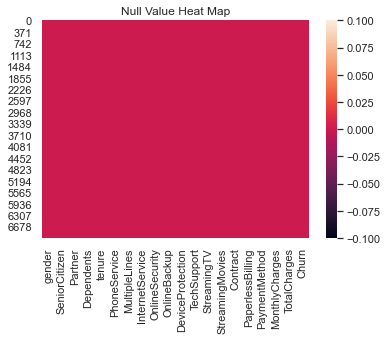

In [344]:
#Checking for null value in all columns.
sns.heatmap(ds.isnull())
plt.title("Null Value Heat Map")
plt.show()

### Observation:- 
No null value present in dataset.

In [345]:
#Checking for Catagorical Variables

categorical = (ds.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)


Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Catagorical Variable Univariate  Analysis

### Observation:-
Same no of customer present in dataset who has parter and not 

### Observation:-
1 more customer who has no dependent exist in this dataset.

### Observation:-
Most of the customer avail PhoneService.

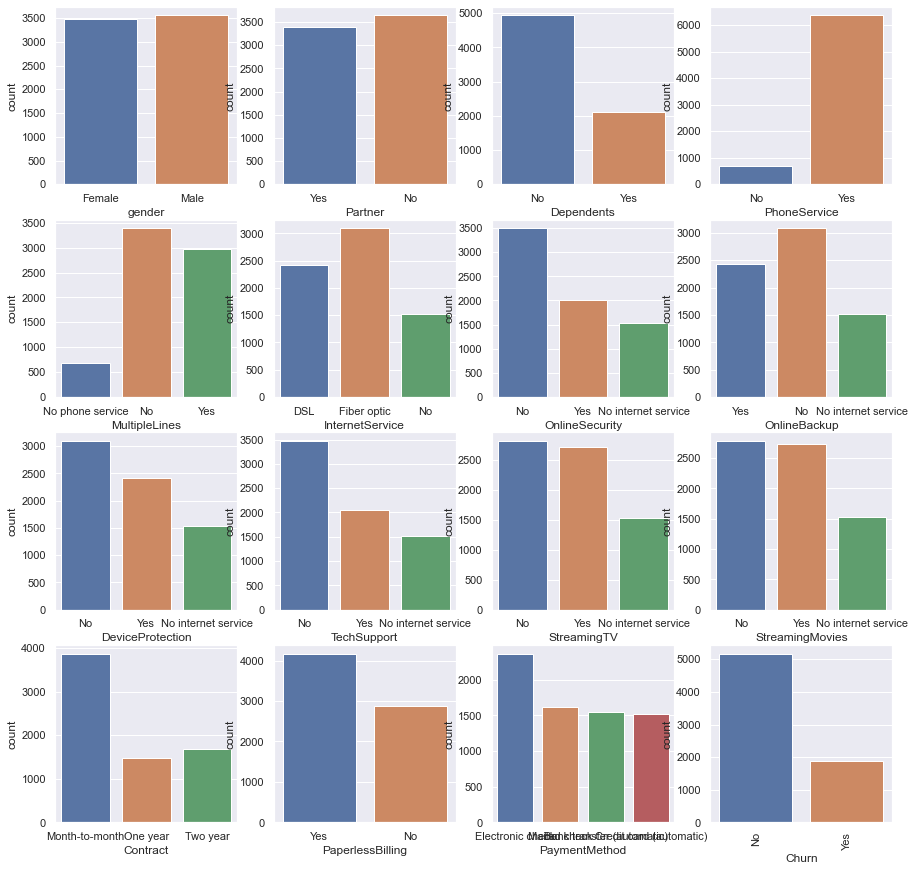

In [346]:
fig,axes = plt.subplots(4,4,figsize=(15,15))

for i, var in enumerate(categorical_list):
    row = i//4
    pos = i % 4    
    plot = sns.countplot(x=var, data=ds, ax=axes[row][pos])
    plt.xticks(rotation = 90)
    

### Observation:-
1. Data is balance w.r.t Gender, means record contain both male and female customer data in equal no.
2. Same no of customer present in dataset who has parter and not
3. customer who has no dependent has much more count in this dataset.
4. Most of the customer avail PhoneService, which is obvious because telecome data has maximum share in phone service then Data and Dish.
5. Fiber Optics service is most femous internet service.
6. Most of the customer do not avail OnlineSecurity and Online backup facility.
7. Paperless bill is taken by most of the customers.
8. Maximum customer pay their bill or recharge using Electronic check.
9. Maximum customer recharge their serivce every month.
10. Churn column has imbalance data, customer changing their operator is comparativly low.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

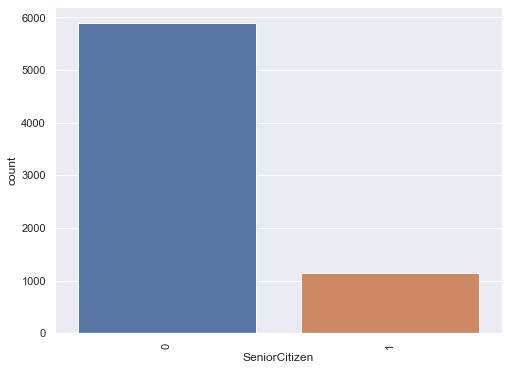

In [347]:
# Variable SeniorCitizen, it is catagorical variable but has numaric value in the form of 0 and 1. o indicate customer is no Seniour Citizen, while 1 indicate customer is Senior citizen.
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='SeniorCitizen', data=ds)
plt.xticks(rotation = 90)

### Observation:-
Count of C\SeniorCitizen customer less compare to non senior citizen customer.

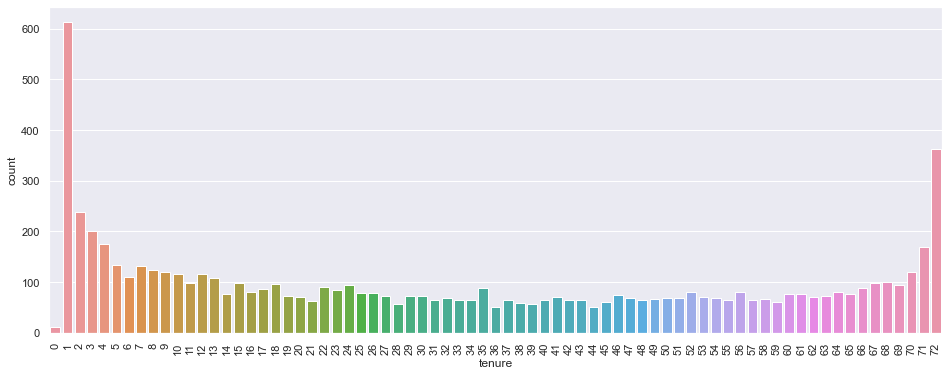

In [348]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='tenure', data=ds)
plt.xticks(rotation = 90)
plt.show()

### Observation:-
1. Maximum customer stayed with company are 1 month old.
2. second higest no customer are those who are connected with company since last 72 month.

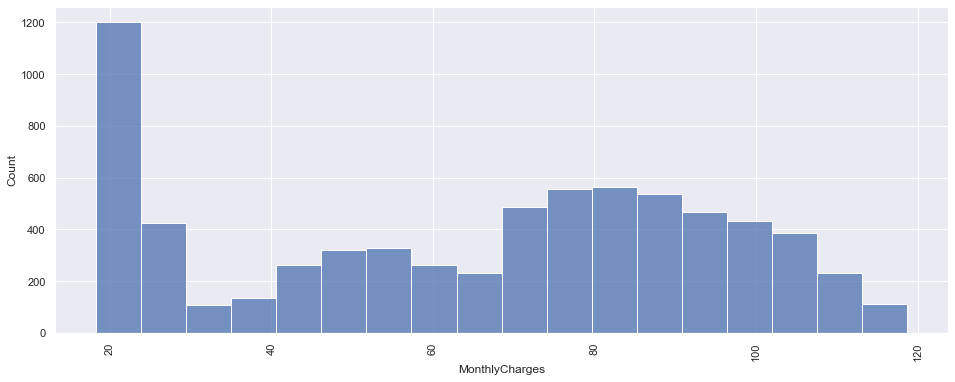

In [349]:
plt.figure(figsize=(16, 6))
plot = sns.histplot(x='MonthlyCharges', data=ds)
plt.xticks(rotation = 90)
plt.show()

### Observation:
Maximum customer has around 20 rupes monthly charges.

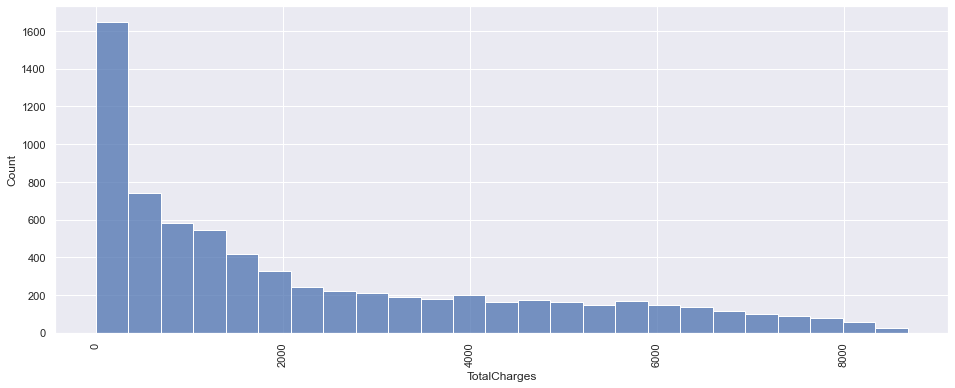

In [350]:
plt.figure(figsize=(16, 6))
plot = sns.histplot(x='TotalCharges', data=ds)
plt.xticks(rotation = 90)
plt.show()

### Observation:-
Maximum no of customer has total charge less then 2000.

### Distribution of Each Feature

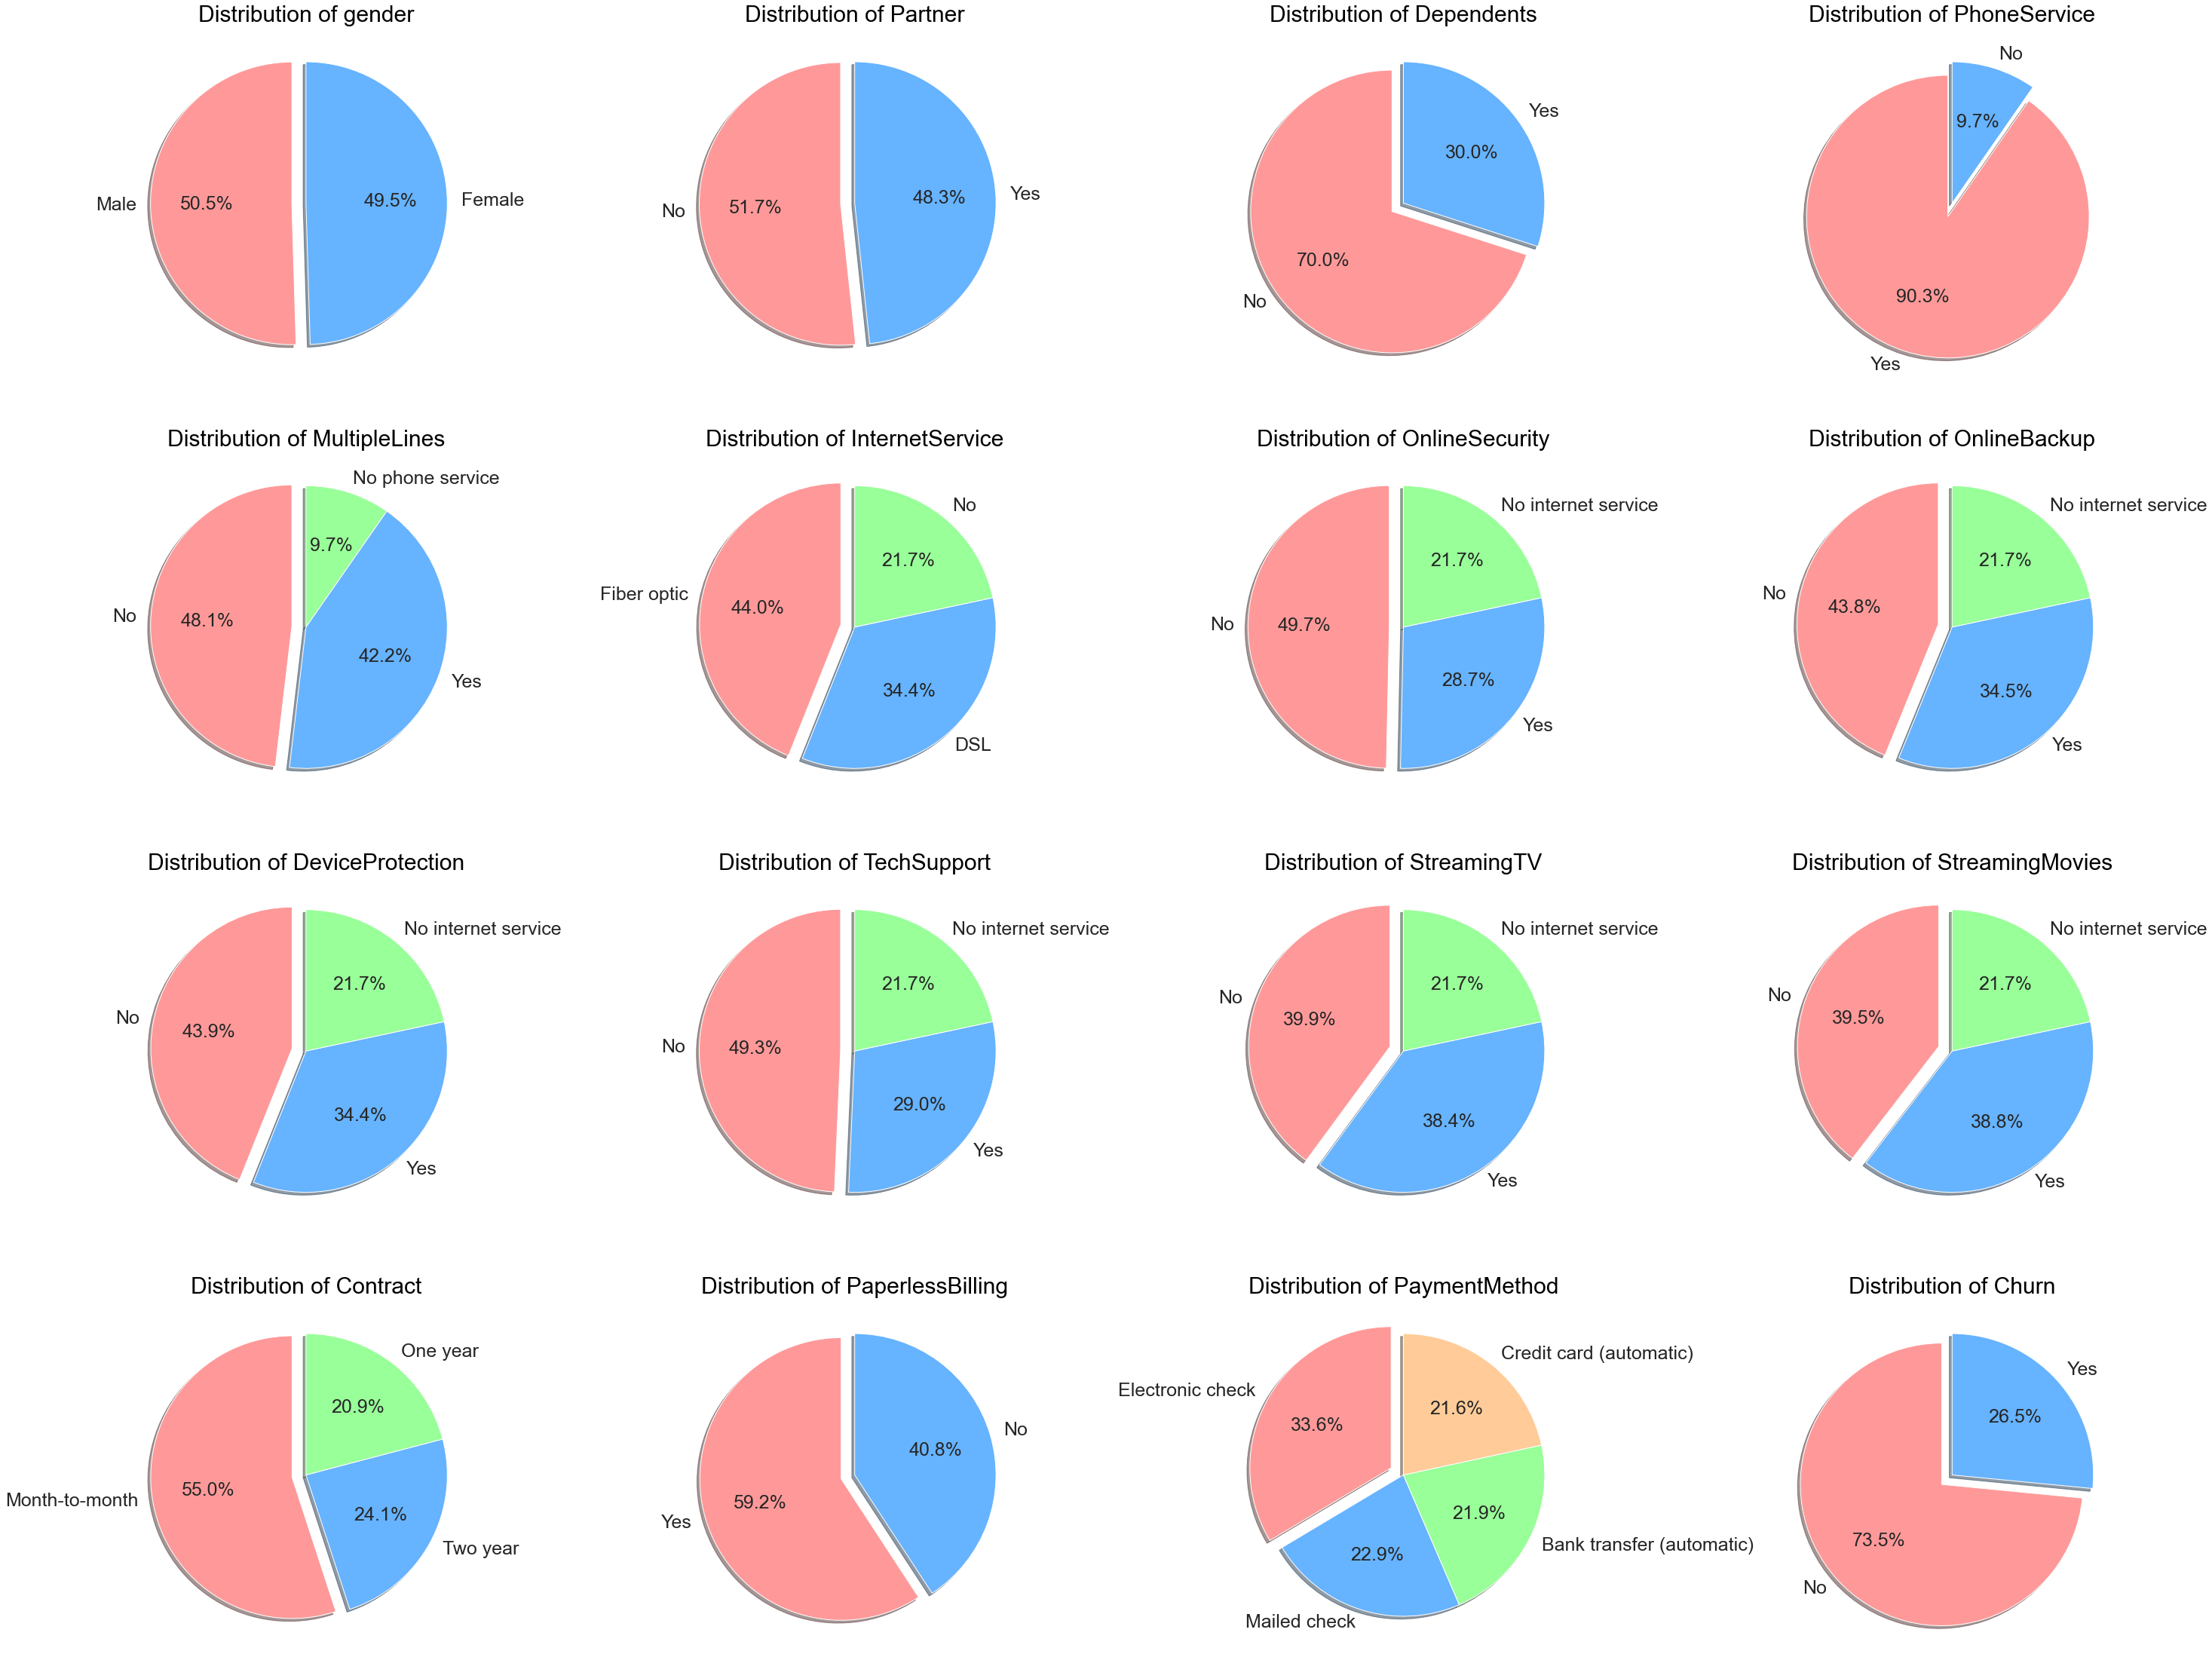

In [351]:
plt.figure(figsize=(50,50))
j = 0

for i in categorical_list:
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']
    
    labels = ds[i].value_counts().index
    sizes = ds[i].value_counts().values
    
    unique = len(ds[i].unique())
    if(unique == 2):
        myexplode = [0.1, 0]
    if(unique == 3):
        myexplode = [0.1, 0,0]
    if(unique == 4):
        myexplode = [0.1,0,0,0]
    
    plt.subplot(5,4,j+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 25})
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 30)
    j += 1

### Distributions of Each Feature According to 'Churn'

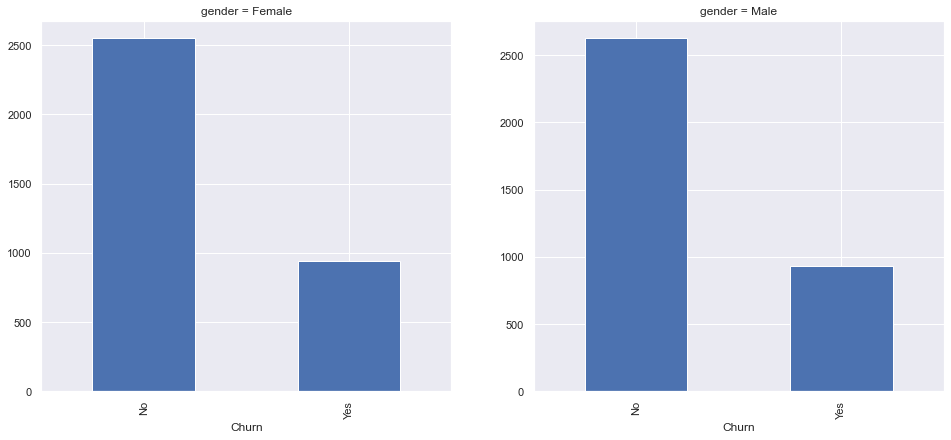

In [352]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('gender = Female')
ds.groupby('gender').Churn.value_counts().loc['Female'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('gender = Male')
ds.groupby('gender').Churn.value_counts().loc['Male'].plot(kind='bar')
plt.show()

### Observation:- 
Both Male and Female customer has equal churn Ratio.

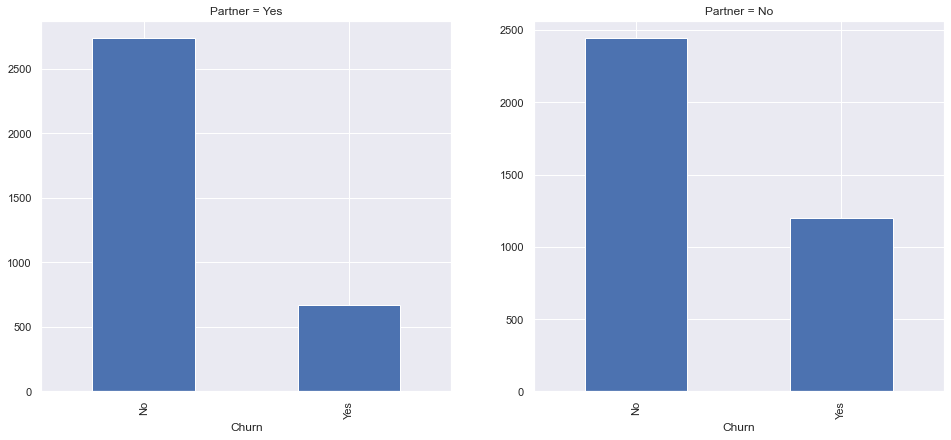

In [353]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Partner = Yes')
ds.groupby('Partner').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Partner = No')
ds.groupby('Partner').Churn.value_counts().loc['No'].plot(kind='bar')
plt.show()

### Observation:-
1. Churn ratio for the Customer who has partner is comparativly low then those who has no partner attached.

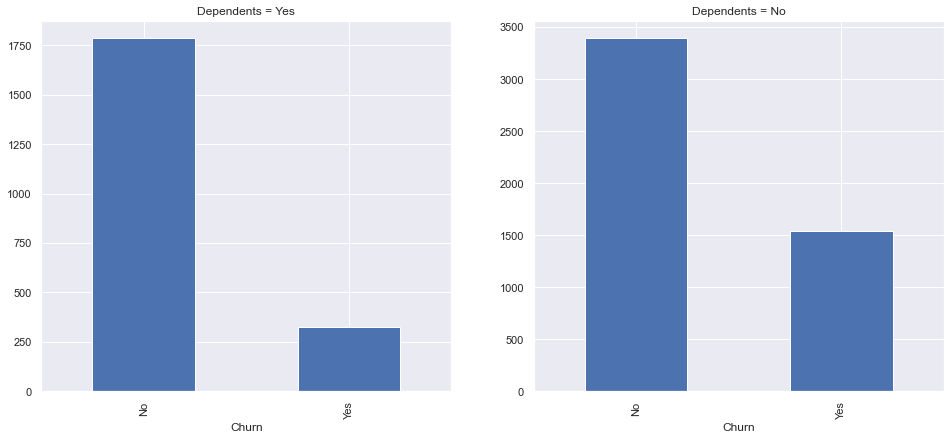

In [354]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Dependents = Yes')
ds.groupby('Dependents').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Dependents = No')
ds.groupby('Dependents').Churn.value_counts().loc['No'].plot(kind='bar')
plt.show()

### Observation:- 
Churn Ratio for no dependent customer is comparativly much.

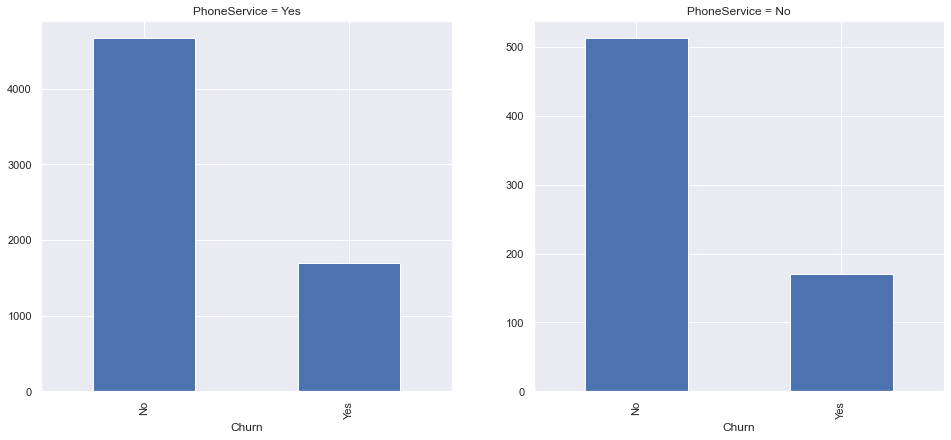

In [355]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('PhoneService = Yes')
ds.groupby('PhoneService').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('PhoneService = No')
ds.groupby('PhoneService').Churn.value_counts().loc['No'].plot(kind='bar')
plt.show()

### Churn customer ratio no afected due to PhoneService.


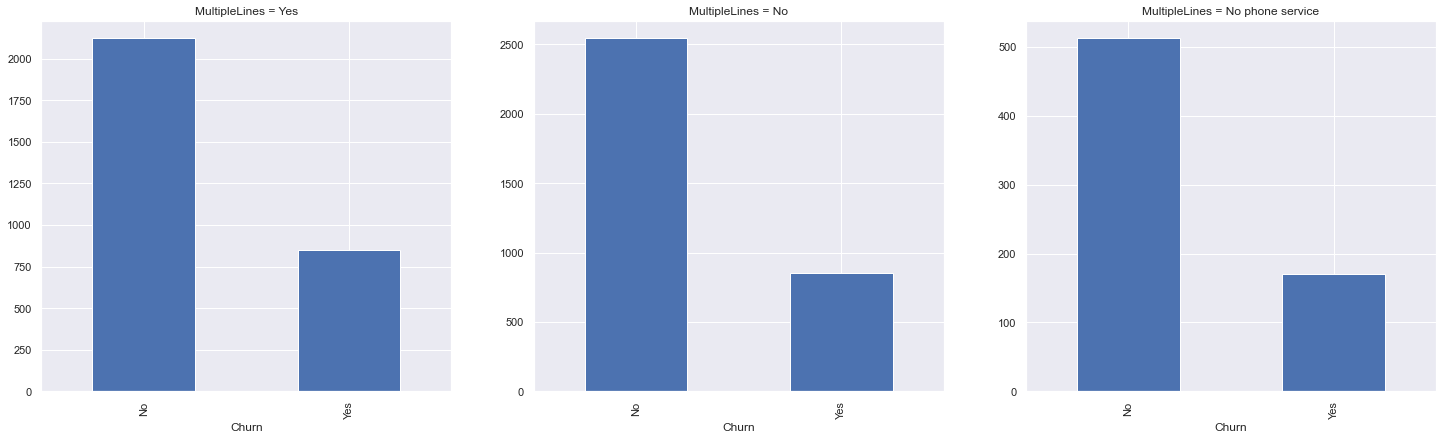

In [356]:
#MultipleLines and Churn relation.

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('MultipleLines = Yes')
ds.groupby('MultipleLines').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('MultipleLines = No')
ds.groupby('MultipleLines').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('MultipleLines = No phone service')
ds.groupby('MultipleLines').Churn.value_counts().loc['No phone service'].plot(kind='bar')
plt.show()

### customer who has aqquered Multipleline has churn ratio slitely high. 

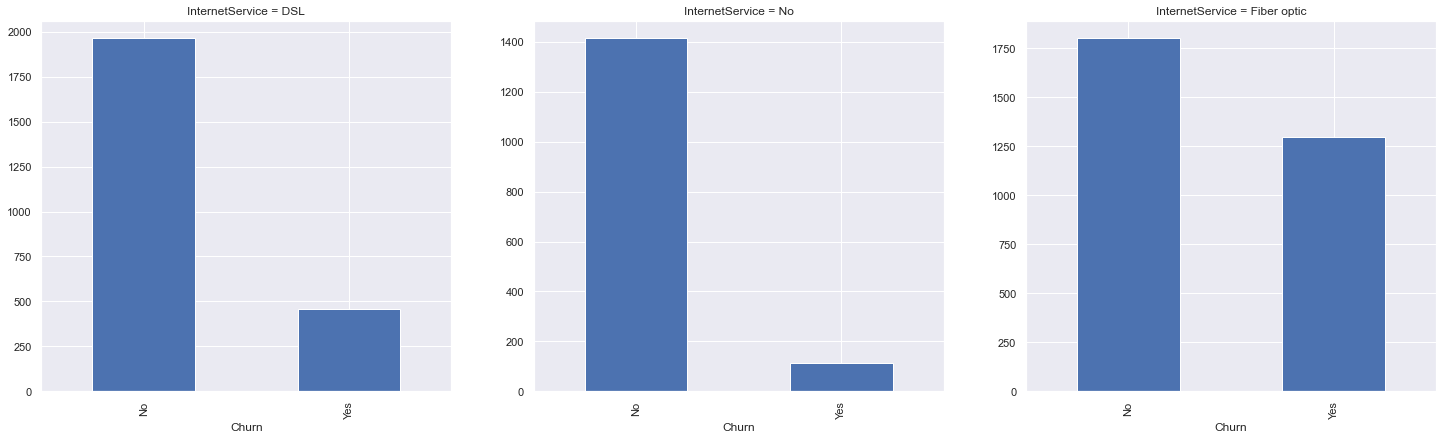

In [357]:
#InternetService and Churn

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('InternetService = DSL')
ds.groupby('InternetService').Churn.value_counts().loc['DSL'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('InternetService = No')
ds.groupby('InternetService').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('InternetService = Fiber optic')
ds.groupby('InternetService').Churn.value_counts().loc['Fiber optic'].plot(kind='bar')

plt.show()

### Customers Using Fiber Optics has highest Churn ratio.

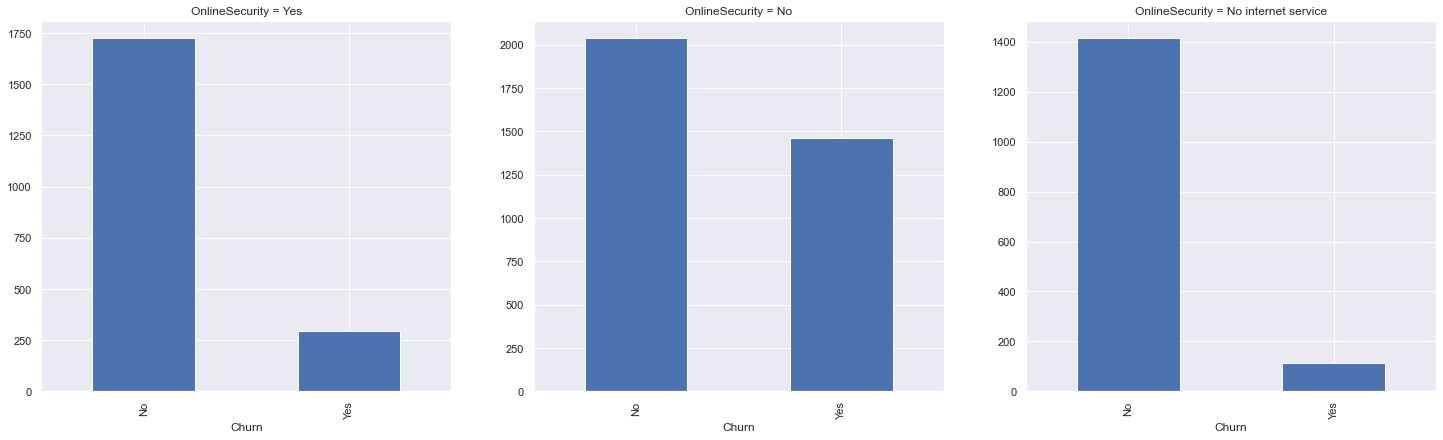

In [358]:
#Online Security and Churn 

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineSecurity = Yes')
ds.groupby('OnlineSecurity').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineSecurity = No')
ds.groupby('OnlineSecurity').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineSecurity = No internet service')
ds.groupby('OnlineSecurity').Churn.value_counts().loc['No internet service'].plot(kind='bar')

plt.show()

### Churn ratio is high for those who do not aquaired OnlineSecurity Service.

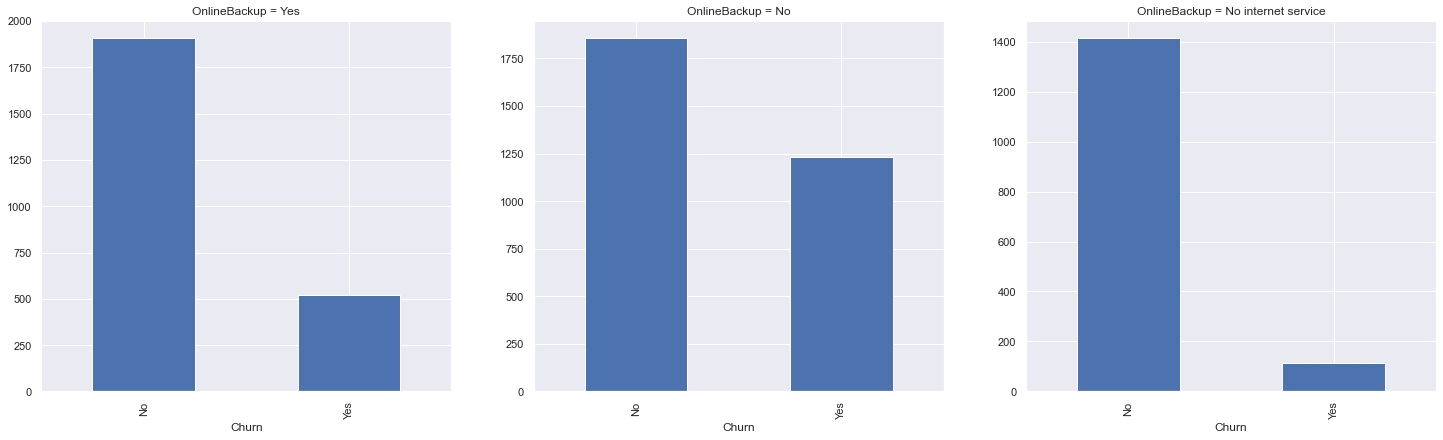

In [359]:
#Online Security Vs Churn
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineBackup = Yes')
ds.groupby('OnlineBackup').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineBackup = No')
ds.groupby('OnlineBackup').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineBackup = No internet service')
ds.groupby('OnlineBackup').Churn.value_counts().loc['No internet service'].plot(kind='bar')
plt.show()

### Customer no having online backup service has high portability ratio.

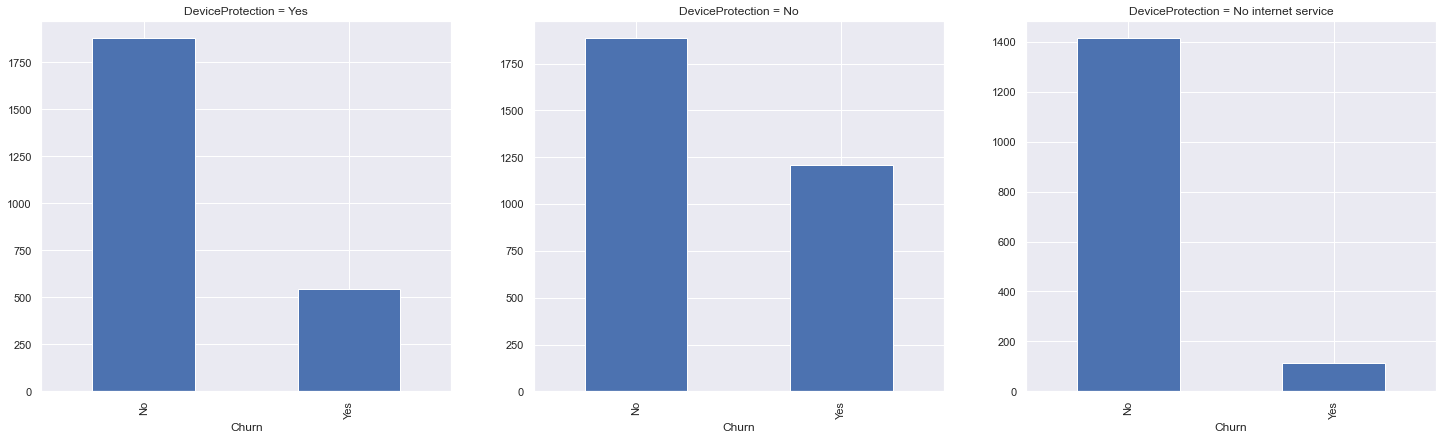

In [360]:
#Device Protection Vs Churn
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('DeviceProtection = Yes')
ds.groupby('DeviceProtection').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('DeviceProtection = No')
ds.groupby('DeviceProtection').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('DeviceProtection = No internet service')
ds.groupby('DeviceProtection').Churn.value_counts().loc['No internet service'].plot(kind='bar')


plt.show()

### Customer who doesn't take DeviceProtection service has high churn count.

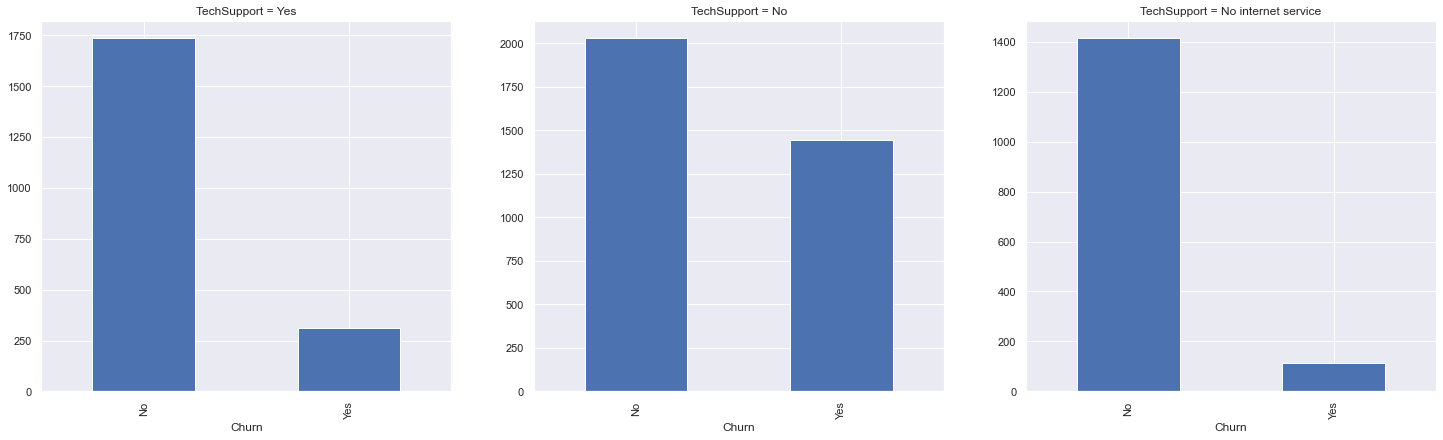

In [361]:
#TechSupport and Churn
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('TechSupport = Yes')
ds.groupby('TechSupport').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('TechSupport = No')
ds.groupby('TechSupport').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('TechSupport = No internet service')
ds.groupby('TechSupport').Churn.value_counts().loc['No internet service'].plot(kind='bar')
plt.show()

### Techsupport play a big role here, customer who doesn't get TechSupport has high Churn Ratio.

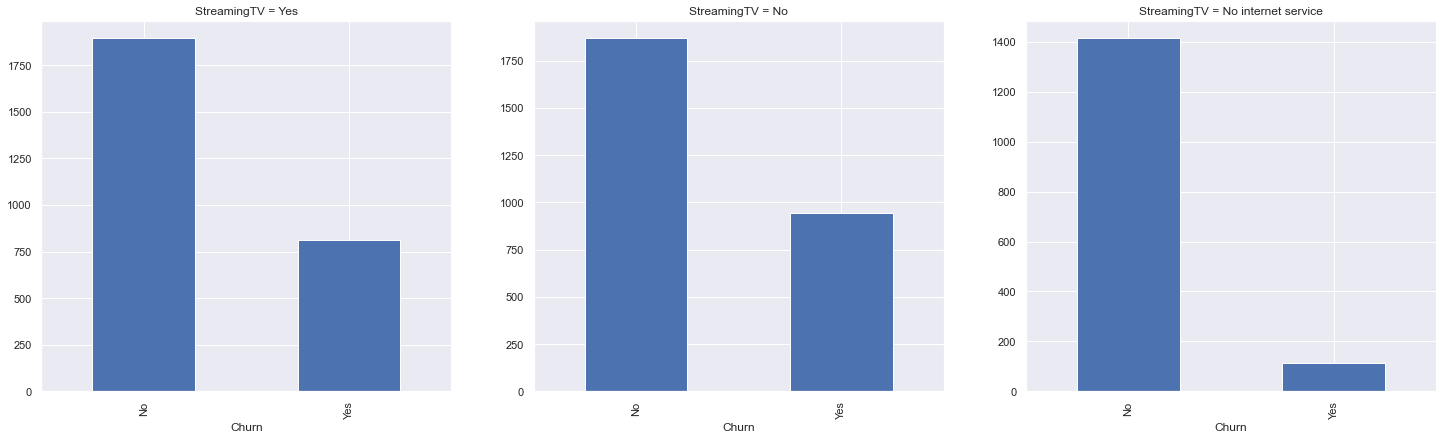

In [362]:
#StreamingTV and Churn
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingTV = Yes')
ds.groupby('StreamingTV').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingTV = No')
ds.groupby('StreamingTV').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingTV = No internet service')
ds.groupby('StreamingTV').Churn.value_counts().loc['No internet service'].plot(kind='bar')
plt.show()

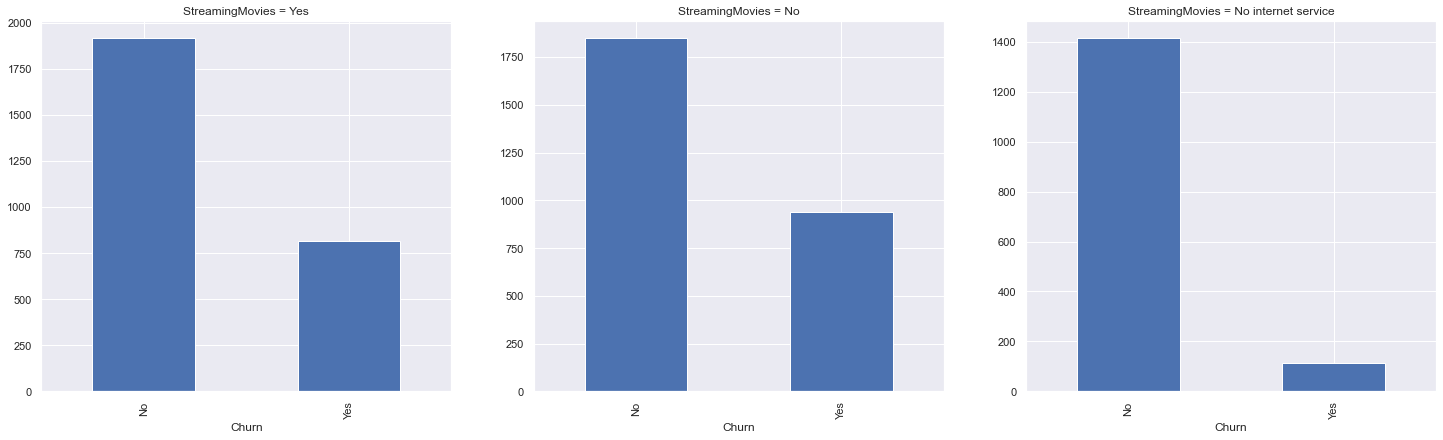

In [363]:
#StreamingMovies and Churn

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingMovies = Yes')
ds.groupby('StreamingMovies').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingMovies = No')
ds.groupby('StreamingMovies').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingMovies = No internet service')
ds.groupby('StreamingMovies').Churn.value_counts().loc['No internet service'].plot(kind='bar')
plt.show()

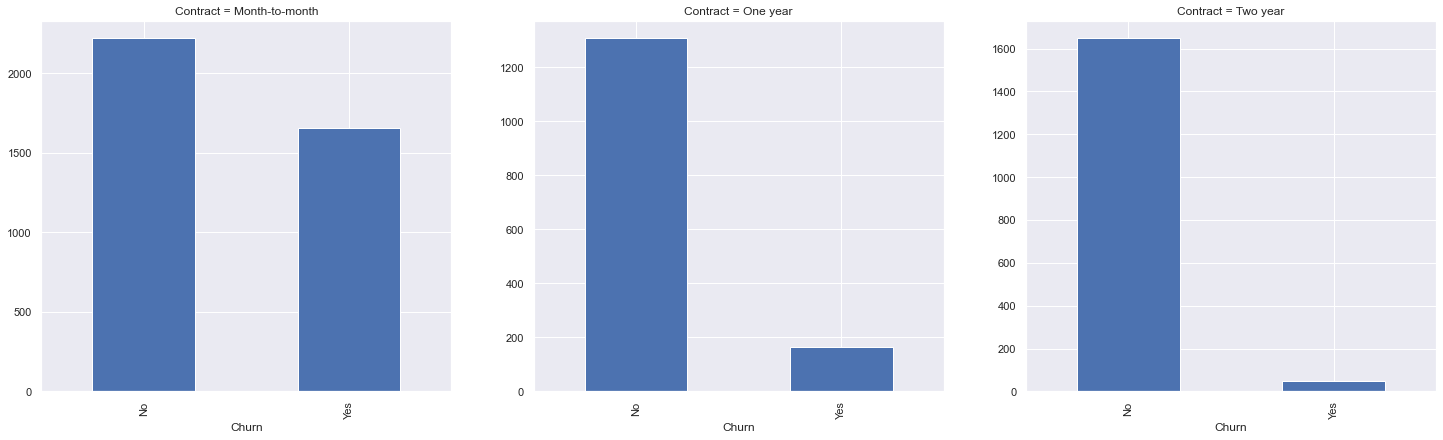

In [364]:
#Contract Vs Churn

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Contract = Month-to-month')
ds.groupby('Contract').Churn.value_counts().loc['Month-to-month'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Contract = One year')
ds.groupby('Contract').Churn.value_counts().loc['One year'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('Contract = Two year')
ds.groupby('Contract').Churn.value_counts().loc['Two year'].plot(kind='bar')
plt.show()

### Customer paying monthly has high Churn ratio

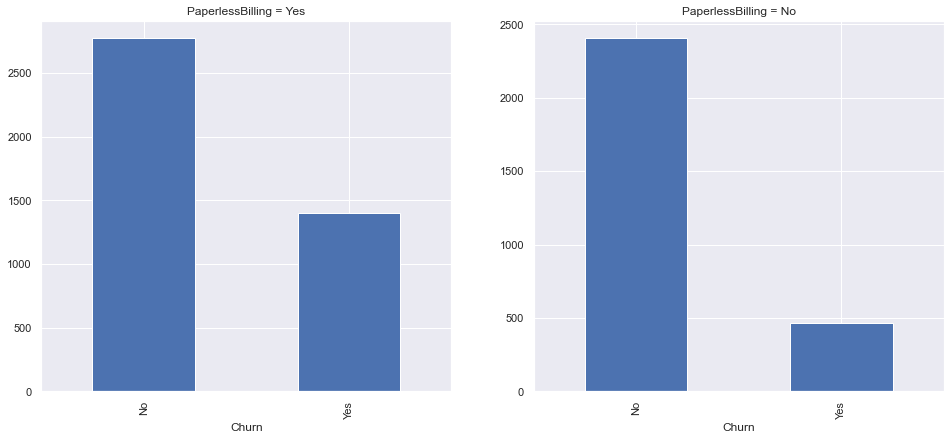

In [365]:
###Paperlessbilling Vs Churn
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('PaperlessBilling = Yes')
ds.groupby('PaperlessBilling').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('PaperlessBilling = No')
ds.groupby('PaperlessBilling').Churn.value_counts().loc['No'].plot(kind='bar')
plt.show()

### Customer who opted for paperless billing has high chances of churn.

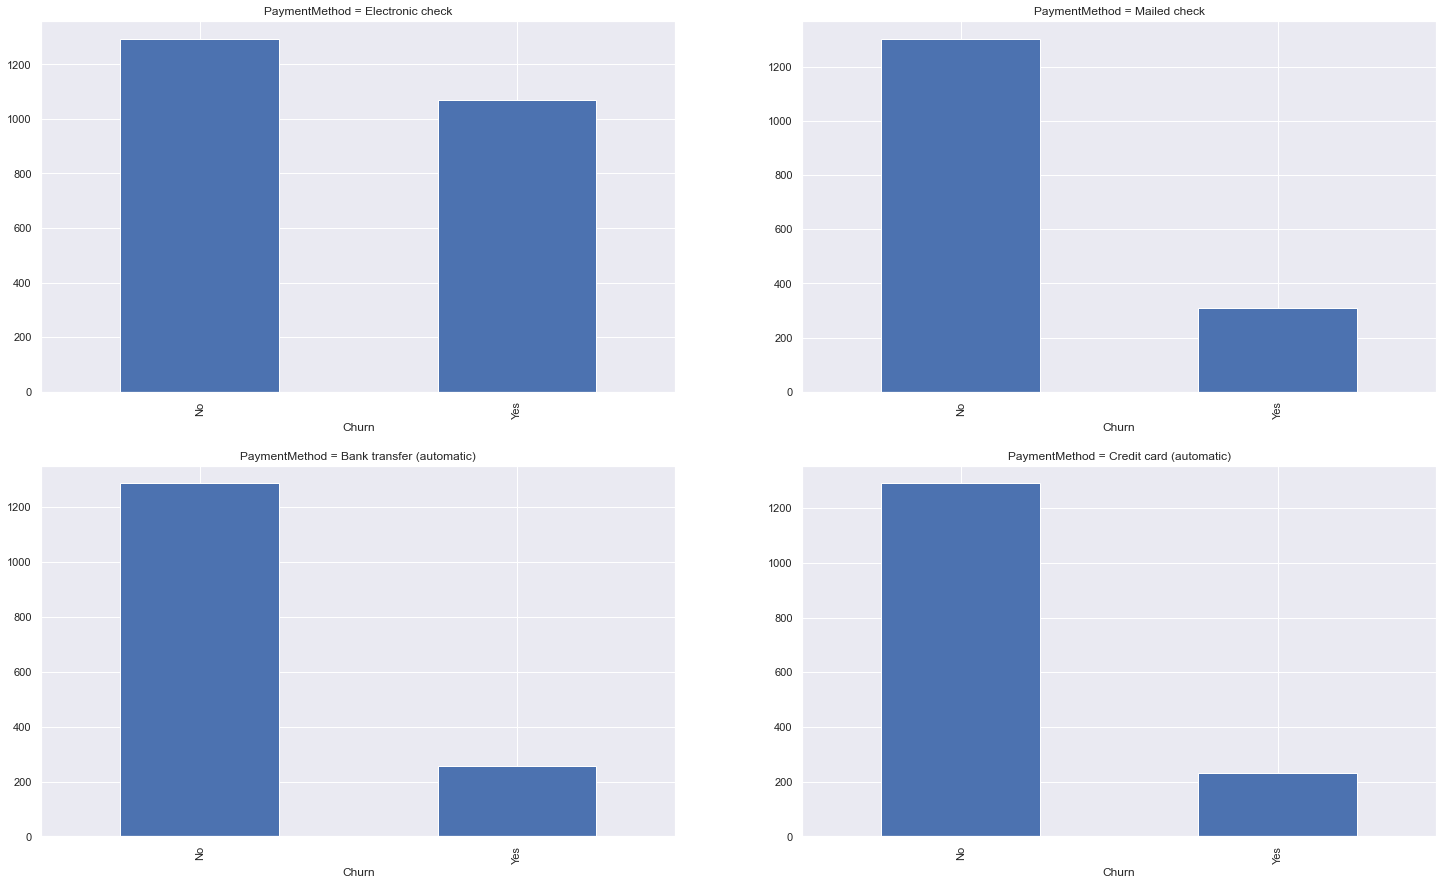

In [366]:
#PaymentMethod Vs Churn
plt.figure(figsize=(25,15))
sns.set_theme(style="darkgrid")

plt.subplot(2,2,1)
plt.title('PaymentMethod = Electronic check')
ds.groupby('PaymentMethod').Churn.value_counts().loc['Electronic check'].plot(kind='bar')

plt.subplot(2,2,2)
plt.title('PaymentMethod = Mailed check')
ds.groupby('PaymentMethod').Churn.value_counts().loc['Mailed check'].plot(kind='bar')

plt.subplot(2,2,3)
plt.title('PaymentMethod = Bank transfer (automatic)')
ds.groupby('PaymentMethod').Churn.value_counts().loc['Bank transfer (automatic)'].plot(kind='bar')

plt.subplot(2,2,4)
plt.title('PaymentMethod = Credit card (automatic)')
ds.groupby('PaymentMethod').Churn.value_counts().loc['Credit card (automatic)'].plot(kind='bar')
plt.show()

### Customer paying their bill using Electrolic check has highest churn count.

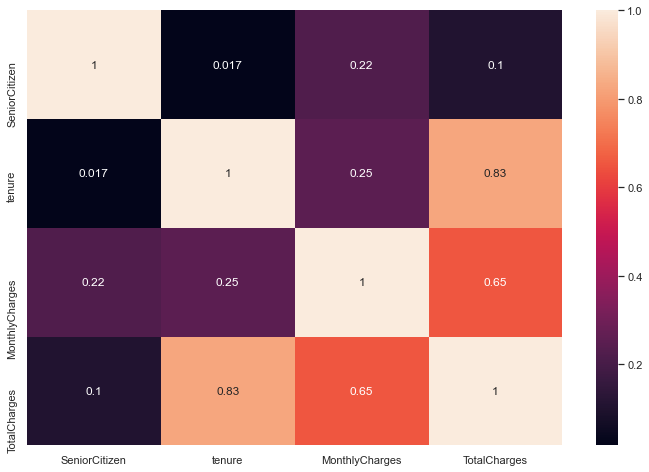

In [367]:
plt.figure(figsize=(12,8)) 
sns.heatmap(ds.corr(), annot=True)
plt.show()

### Monthly charges Tenure and Total Charges has high correlation with each other.

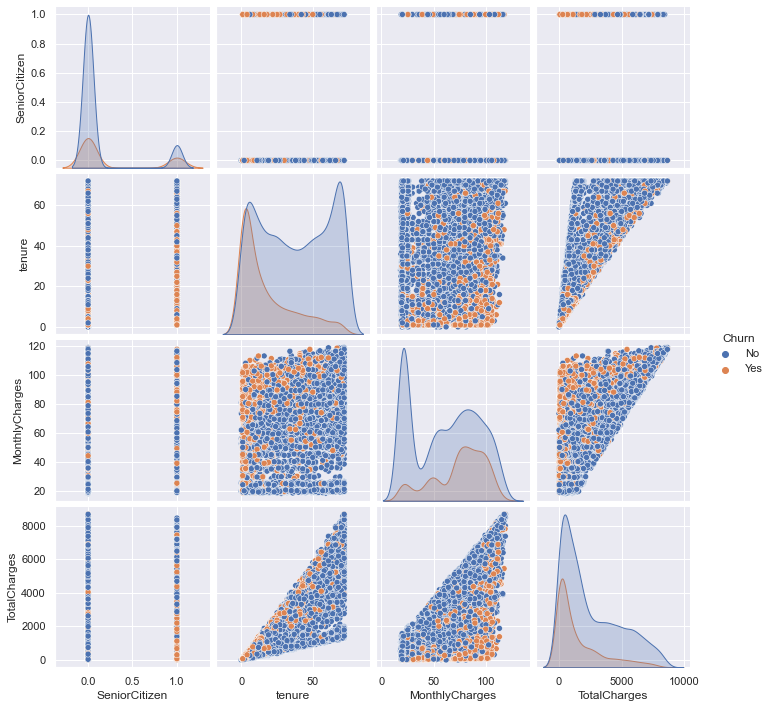

In [368]:
sns.pairplot(ds, hue = 'Churn')

## Observation:-
1. Tenure has very strange relation with churn, initially churn ratio is high with increasing tenure but as customer gets older its probability of churn is decreases. in other word new customer has high probability of porting while old customer are more reliable customer.
2. Monthly chargest also has linear correlation, if monthly chages increases churn ratio is also increase.


## Skewness

In [384]:
ds.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

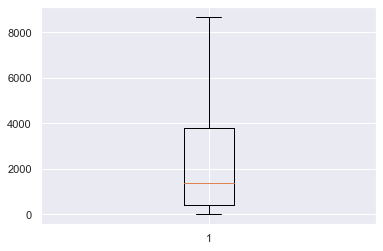

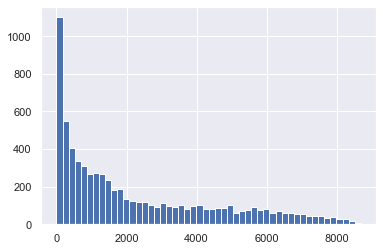

In [385]:
plt.boxplot(ds.TotalCharges)

plt.figure()
hist = ds.TotalCharges.hist(bins=50)
plt.show()

### No Outlier in data.

In [386]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding

## Columns having more then two value will be encoded using onehot encoding, while catagorical column having two value will be encoded using simple encoding method.

In [387]:
pd.set_option('display.max_columns', None) ##to display all the columns
ds_new =ds  # Creating copy of data source.
#ds = ds_new

In [388]:
Onehot_encoding = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','Contract','PaymentMethod']

simple_encoding = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']


###  One Hot Encoding

In [389]:
for val in Onehot_encoding:
    print(val)
    p = ds_new[[val]]
    temp = pd.get_dummies(p)
    ds_new=pd.concat([ds_new,temp],axis = 1)
    ds_new.drop(val, axis = 1, inplace = True)



MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod


In [390]:
ds_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,42.30,1840.75,No,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


### Simple Encoding for below features.

simple_encoding = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [391]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
column = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for val in column:
    ds_new[val]= le.fit_transform(ds_new[val].astype(str))  

In [392]:
ds_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


### All features has been encoded in numerical values.

## Split x and y

In [393]:
x = ds_new.drop(['Churn'], axis=1)
y = ds_new['Churn']

In [394]:
x.skew()

gender                                    -0.019031
SeniorCitizen                              1.833633
Partner                                    0.067922
Dependents                                 0.875199
tenure                                     0.239540
PhoneService                              -2.727153
PaperlessBilling                          -0.375396
MonthlyCharges                            -0.220524
TotalCharges                               0.963235
MultipleLines_No                           0.074752
MultipleLines_No phone service             2.727153
MultipleLines_Yes                          0.316610
InternetService_DSL                        0.658113
InternetService_Fiber optic                0.243494
InternetService_No                         1.375769
OnlineSecurity_No                          0.013350
OnlineSecurity_No internet service         1.375769
OnlineSecurity_Yes                         0.943722
OnlineBackup_No                            0.248142
OnlineBackup

### Only one column TotalCharges has some skewness, which we will removing using power transformation.

In [395]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)
x = pd.DataFrame(data_trans, columns = x.columns)
x.skew()

gender                                    -0.019031
SeniorCitizen                              1.833633
Partner                                    0.067922
Dependents                                 0.875199
tenure                                    -0.243325
PhoneService                              -2.727153
PaperlessBilling                          -0.375396
MonthlyCharges                            -0.259035
TotalCharges                              -0.146121
MultipleLines_No                           0.074752
MultipleLines_No phone service             2.727153
MultipleLines_Yes                          0.316610
InternetService_DSL                        0.658113
InternetService_Fiber optic                0.243494
InternetService_No                         1.375769
OnlineSecurity_No                          0.013350
OnlineSecurity_No internet service         1.375769
OnlineSecurity_Yes                         0.943722
OnlineBackup_No                            0.248142
OnlineBackup

In [396]:
#from sklearn.preprocessing import StandardScaler
#stdsc = StandardScaler()
#x = stdsc.fit_transform(x)

## Check for Best Random State

In [399]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.6279926335174955 on Random_state 178


## Data is imbalance hence we will use over sampling get correct no of sample 

In [400]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.42,random_state=24)

In [401]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=10) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1122
Before OverSampling, counts of label '0': 2962 

After OverSampling, the shape of train_X: (5924, 40)
After OverSampling, the shape of train_y: (5924,) 

After OverSampling, counts of label '1': 2962
After OverSampling, counts of label '0': 2962


In [402]:
x_train = x_train_res
y_train = y_train_res

In [409]:
#LR = LogisticRegression()
rf = RandomForestClassifier()
knn= KNeighborsClassifier(n_neighbors=5)
sv = SVC()
ad= AdaBoostClassifier()
model = [rf,knn,sv,ad]

### Train test multiple models and get Accurecy

In [410]:
from sklearn.model_selection import cross_val_score
score_mod = {'Model':[],'Accurecy':[],'Cross_val':[], 'diff':[]}
for val in model:
    val.fit(x_train,y_train)
    pred = val.predict(x_test)
    print("\n Prediction and Accuracy of model ", str(val))
    score_mod['Model'].append(str(val))
    print(accuracy_score(y_test,pred))
#   print(f1_score(y_test,pred))
    score_mod['Accurecy'].append(accuracy_score(y_test,pred)*100)
#   score_mod['F1-score'].append(f1_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scr = cross_val_score(val,x_train,y_train, cv=5)
    score_mod['Cross_val'].append(scr.mean()*100)
    score_mod['diff'].append(scr.mean()*100 - accuracy_score(y_test,pred)*100)


 Prediction and Accuracy of model  RandomForestClassifier()
0.7840486650895573
[[1892  320]
 [ 319  428]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2212
           1       0.57      0.57      0.57       747

    accuracy                           0.78      2959
   macro avg       0.71      0.71      0.71      2959
weighted avg       0.78      0.78      0.78      2959


 Prediction and Accuracy of model  KNeighborsClassifier()
0.6985468063534978
[[1520  692]
 [ 200  547]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      2212
           1       0.44      0.73      0.55       747

    accuracy                           0.70      2959
   macro avg       0.66      0.71      0.66      2959
weighted avg       0.77      0.70      0.72      2959


 Prediction and Accuracy of model  SVC()
0.7664751605272051
[[1714  498]
 [ 193  554]]
              precision    recall  f1-score   

In [411]:
#score_mod
result1=pd.DataFrame(score_mod)
result1

,Model,Accurecy,Cross_val,diff
0,RandomForestClassifier(),78.404867,85.314916,6.910050
1,KNeighborsClassifier(),69.854681,79.608607,9.753926
2,SVC(),76.647516,81.414714,4.767198
3,AdaBoostClassifier(),77.526191,81.752822,4.226631


## Highest Accuracy score is 78 coming for Random Forest and AdaBoost model, Random forest corss validation score is 85, while Aaboost corss validation score is 81, we will tune both the model hyper parameter tuning and see which model  give us best result.

# Hyper parameter Tuning for Random Forest Classification model.

In [426]:
from sklearn.model_selection import GridSearchCV
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200,500], "criterion":["gini","entropy"],
              "max_depth":[3,6,8,25],"min_samples_split":[5,10,12,18]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[5,6,7,8] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=120)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search = GridSearchCV(rf, parameters, cv = 4, verbose=2, n_jobs = -1)
# Fit the random search model
result=grid_search.fit(x_train, y_train)
#print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
pred = grid_search.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Fitting 4 folds for each of 768 candidates, totalling 3072 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
0.8006814310051107
[[2383  199]
 [ 503  437]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2582
           1       0.69      0.46      0.55       940

    accuracy                           0.80      3522
   macro avg       0.76      0.69      0.71      3522
weighted avg       0.79      0.80      0.79      3522



### Saving Random forest Model with Tuned parameters

In [427]:
import joblib 
joblib.dump(grid_search,'Customer_churn_randome_forest.pki')

['Customer_churn_randome_forest.pki']

In [428]:
model = joblib.load('Customer_churn_randome_forest.pki')

In [429]:
prediction = model.predict(x_test)

In [430]:
prediction = pd.DataFrame(prediction)  #Converting into Data Frame

In [431]:
prediction.to_csv('Result_random_forest.csv')

# Hyper Parameter Tuning for AdaBoost Classification Model

In [432]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
ad= AdaBoostClassifier()
grid_search = GridSearchCV(estimator=ad, param_grid=grid, n_jobs=-1, cv=4, scoring='accuracy')
result=grid_search.fit(x_train, y_train)
#print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
pred = grid_search.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 500}
0.8055082339579784
[[2348  234]
 [ 451  489]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2582
           1       0.68      0.52      0.59       940

    accuracy                           0.81      3522
   macro avg       0.76      0.71      0.73      3522
weighted avg       0.80      0.81      0.80      3522



### Random Forest and Adaboost both havig 80% accuracy score after Hyper parameter tuning which was around 78% earlier .

### We can use any  Model for further prediction.

### Saving Adaboost Model with Tuned parameters

In [433]:
import joblib 
joblib.dump(grid_search,'Customer_churn_adaboost.pki')

['Customer_churn_adaboost.pki']

In [434]:
model = joblib.load('Customer_churn_adaboost.pki')

In [435]:
prediction = model.predict(x_test)

In [436]:
prediction = pd.DataFrame(prediction)  #Converting into Data Frame

In [437]:
prediction.to_csv('Result_adaboost.csv')

In [438]:
prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
3517,0
3518,0
3519,0
3520,0
